In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import lfilter
from scipy import signal
import scipy
import math
from iir_biquad import iir_biquad as iir_biquad_patrick
from iir_biquad import test as test_patrick
from IIRSim import *
from FrequencyResponse import *

# Generator Functions

In [2]:
def gen_gauss_noise(gauss_sample_num=10000*8, zero_pad=4, noise_size=205, counter=-1):
    """ Generate Gaussian noise with a Hanning window and optional zero padding on either side"""
    gauss_samps = np.random.normal(loc=0,scale=noise_size,size=gauss_sample_num)
    window = np.hanning(len(gauss_samps))
    gauss_samps = np.concatenate((np.zeros(8*zero_pad), np.multiply(window, gauss_samps), np.zeros(8*zero_pad))) # The padding at the end is to deal with latency
    gauss_samps = np.maximum(gauss_samps, -1*np.ones(len(gauss_samps))*(2**11))
    gauss_samps = np.minimum(gauss_samps, np.ones(len(gauss_samps))*(2**11)-1)
    gauss_samps = np.array(np.round(gauss_samps),dtype=np.int64)
    gauss_samps_old = np.copy(gauss_samps)
    for i in range(len(gauss_samps)):
        gauss_samps[i] = twos_complement_integer(gauss_samps[i],12)
    with open("001_files/inputs/gauss_input_%d_sigma_hanning_clipped_%d.dat"%(noise_size, counter),"w") as f:
        for samp in gauss_samps:
            f.write("%d\n"%(samp))
    return gauss_samps_old


In [3]:
def gen_pulse(pulse_sample_num=10000*8, zero_pad=4, impulse_size=205, counter=-1):
    """ Generate an impulse"""
    # pulse_samps = {}
    # pulse_samps_old = {}
    # pulse_sample_num = 10000 * 8
    # noise_size=205
    pulse_samps = np.zeros(pulse_sample_num)#np.random.normal(loc=0,scale=noise_size,size=pulse_sample_num)
    pulse_samps[0] = impulse_size
    pulse_samps = np.concatenate((np.zeros(8*zero_pad), pulse_samps, np.zeros(8*zero_pad))) # The padding at the end is to deal with latency
    pulse_samps = np.maximum(pulse_samps, -1*np.ones(len(pulse_samps))*(2**11))
    pulse_samps = np.minimum(pulse_samps, np.ones(len(pulse_samps))*(2**11)-1)
    pulse_samps = np.array(np.round(pulse_samps),dtype=np.int64)
    pulse_samps_old = np.copy(pulse_samps)
    for i in range(len(pulse_samps)):
        pulse_samps[i] = twos_complement_integer(pulse_samps[i],12)
    with open("001_files/inputs/pulse_input_height_%d_clipped.dat"%(impulse_size),"w") as f:
        for samp in pulse_samps:
            f.write("%d\n"%(samp))
    return pulse_samps_old

In [4]:
def gen_tone(freq_MHz, n_samples=10000*8, zero_pad=4, amplitude=2**11):
    FREQ_SAMPLE = 3000
    samps=quantized_sample_generator(freq_MHz/FREQ_SAMPLE, n_samples=n_samples, m=8, phase=0, in_amplitude=(amplitude/(2**11)))
    window = np.hanning(len(samps))
    samps = np.multiply(window, samps)
    samps = np.array(np.round(samps),dtype=np.int64)
    samps = np.concatenate((np.zeros(8*zero_pad), samps, np.zeros(8*zero_pad)))
    samps = np.array(np.round(samps),dtype=np.int64)
    oldsamps = np.array(samps, dtype=np.int64)
    for i in range(len(samps)):
        samps[i] = twos_complement_integer(samps[i],12)
    with open("001_files/inputs/input_%d_MHz_%d_zpclocks_hanning.dat"%(freq_MHz,zero_pad),"w") as f:
        for samp in samps:
            f.write("%d\n"%(samp))
    return oldsamps

# Single Tones With Hannings

In [5]:
ZERO_PAD_CLOCKS=3
AMPLITUDE = 2**8 # Some fraction of the +-2**11 range
tone_samps = {}
for freq_MHz in range(0,1500,5):
    tone_samps[freq_MHz] = gen_tone(freq_MHz,amplitude=AMPLITUDE)

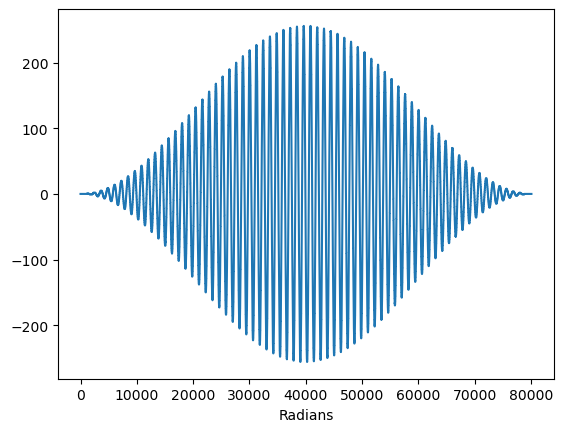

In [7]:
plt.plot(range(len(tone_samps[5])), tone_samps[5])
# plt.xlim(0,1000)
plt.xlabel("Radians")
plt.show()

# Gaussian Noise, No Tone

In [8]:
gauss_samps = {}
for noise_size in range(50,1001, 50):
    gauss_samps[noise_size] = []
    for counter in range(100):
        gauss_samps[noise_size].append(gen_gauss_noise(noise_size=noise_size, counter=counter))

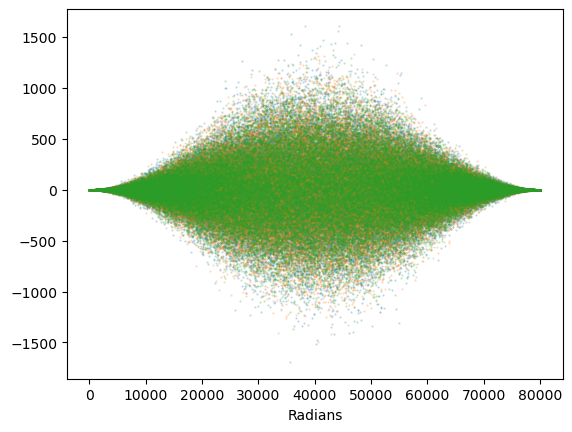

In [13]:
plt.plot(range(len(gauss_samps[400][0])), gauss_samps[400][0], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(gauss_samps[400][1])), gauss_samps[400][1], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(gauss_samps[400][2])), gauss_samps[400][2], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.xlabel("Radians")
plt.show()

# Impulse

In [18]:
imp_samps = {}
for imp_size in range(0,12, 1):
    imp_samps[imp_size] = gen_pulse(impulse_size=2**imp_size)

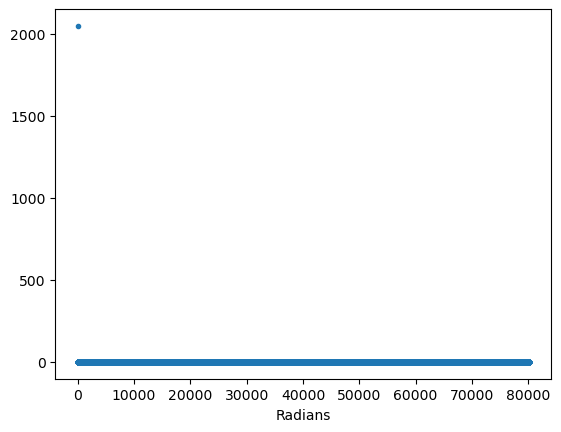

In [19]:
plt.plot(range(len(imp_samps[11])), imp_samps[11], linestyle="None", marker=".")
plt.xlabel("Radians")
plt.show()